In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [48]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [49]:
DATA_DIR = 'D:/Data/股票分析/'

In [50]:
df = pd.read_excel('%s/研究增强.xls'%(DATA_DIR), converters={'证券代码': str})
# df = pd.read_excel('%s/创新成长.xls'%(DATA_DIR), converters={'证券代码': str})
# df = pd.read_excel('%s/惠泽.xls'%(DATA_DIR), converters={'证券代码': str})

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [51]:
industry = pd.read_excel('../data/申万行业分类表.xlsx')

In [52]:
industry2theme = {}
for col in industry.columns:
    for i in industry[col]:
        if type(i) == str:
            industry2theme[i.rstrip('(申万)')] = col
            industry2theme[i.rstrip('Ⅱ(申万)')] = col
#             print(i.rstrip('Ⅱ(申万)'), col)
industry2theme['证券Ⅱ'] = '金融地产'

In [53]:
df = df.drop(df.index[-1])

In [54]:
def to_windcode(code):
    if code.startswith('6'):
        return code + '.SH'
    else:
        return code + '.SZ'

In [55]:
df['windcode'] = [to_windcode(x) for x in df['证券代码']]

In [56]:
data = w.wss(df['windcode'].tolist(), 'industry_sw', 'industryType=2')

In [57]:
df['industry_sw'] = data.Data[0]

In [58]:
df['industry_theme'] = [industry2theme[x] if x in industry2theme else np.NaN for x in df['industry_sw']]

In [59]:
theme = df.groupby('industry_theme').sum()['市值比净值(%)']

In [64]:
theme = theme.loc[['金融地产', '可选消费', '必选医药', '信息科技']]

In [65]:
theme = theme / theme.sum()

In [66]:
theme

industry_theme
金融地产    0.462616
可选消费    0.259346
必选医药    0.084169
信息科技    0.193869
Name: 市值比净值(%), dtype: float64

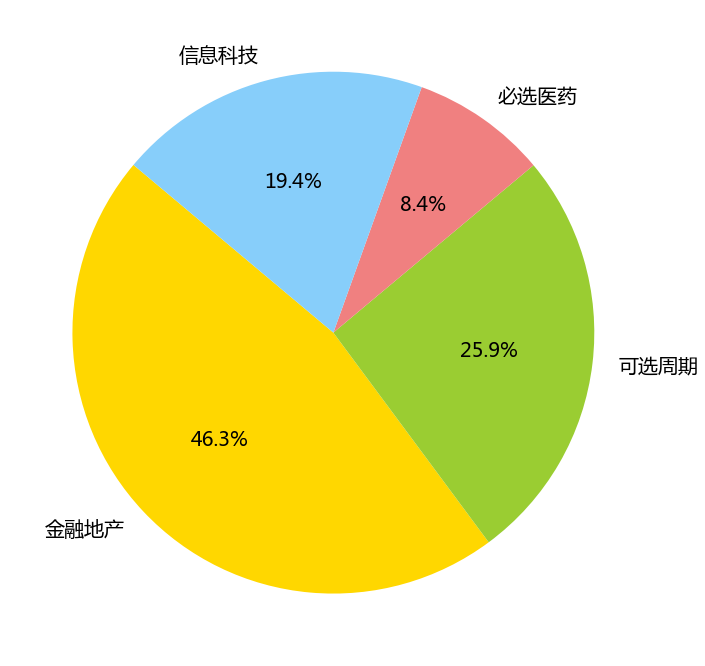

In [69]:
fig, ax = plt.subplots(figsize=(12, 12))

labels = theme.index.tolist()
labels = ['金融地产', '可选周期', '必选医药', '信息科技']
sizes = theme.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange']

_ = ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 20})
# _ = ax.set_title('行业配置观点', fontsize=25, y=1.)
# fig.savefig('../pic/行业配置观点.png', format='png', dpi=200, bbox_inches='tight')